# 01 Post process turbine simulation
## -- Flow field --

In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as ncdf
import pandas as pd
import os

In [30]:
import moa_python
from moa_python.post_plane import Post_plane
from moa_python.post_turbine import Post_turbine

## Case with OpenFAST turbine

In [7]:
case_folder = '/projects/ssc/jfrederi/amr-wind-runs/precursor-reverted/baseline_8ms'
hor_plane_file = 'post_processing/samplingPlane14400.nc'
ver_plane_file = 'post_processing/samplingSlice14400.nc'

### Horizontal plane

In [8]:
full_filename_hor_plane = os.path.join(case_folder,hor_plane_file)
freq = 1
hor_plane = Post_plane(full_filename_hor_plane, origin = [480,480,0], freq = freq)

## Turbine parameters
D = 240
hub_height = 150
t = 10000
overhang = 12.0313
x0 = 2*D
y0 = 2*D
Nturb = 1
dist = 5*D

# Set origin and scale to rotor diameter
hor_plane.set_origin(x = x0, y = y0)
hor_plane.scale_to_rot_diam(D)

Plane has 1 plane(s) in 361 time steps from 7200.0 to 10799.999999965657
Plane offsets: [150.]


Plotting u velocity for plane at location 0.625 at time 10000
Nearest point to 0.625 is 0.625
Nearest time to 10000 is 9999.999999977299
Returning u velocity plane for slice at 0.625 at time 9999.999999977299


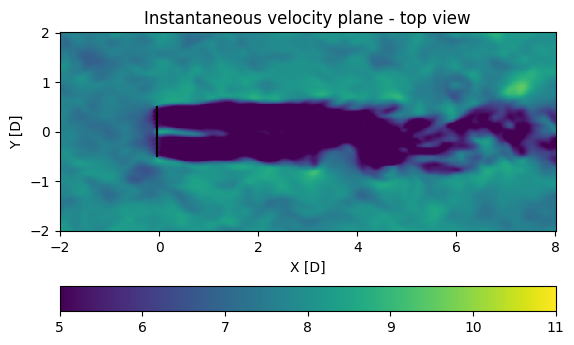

In [9]:
ax = hor_plane.plot_plane(z = hub_height/D, time = t, vmin=5., vmax=11.)
ax.set_title("Instantaneous velocity plane - top view");
for n in range(Nturb):
    hor_plane.plot_turbine(turb_loc = [(-overhang+n*dist)/D,0])

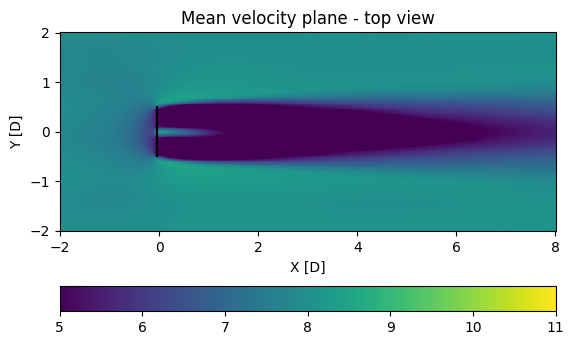

In [10]:
timespan = [8800, 10800]

ax = hor_plane.plot_mean_plane(z = hub_height/D, timespan = timespan, vmin=5., vmax=11., verbose = 0)
ax.set_title("Mean velocity plane - top view");
for n in range(Nturb):
    hor_plane.plot_turbine(turb_loc = [(-overhang+n*dist)/D,0])

### Vertical plane

In [11]:
full_filename_slice = os.path.join(case_folder,ver_plane_file)
ver_plane = Post_plane(full_filename_slice, freq)

# Set origin and scale to rotor diameter
ver_plane.set_origin(center='x')
ver_plane.scale_to_rot_diam(D)

Plane has 4 plane(s) in 361 time steps from 7200.0 to 10799.999999965657
Plane offsets: [   0.  720. 1200. 1680.]


Plotting u velocity for plane at location 0.0 at time 10000
Nearest point to 0.0 is 0.0
Nearest time to 10000 is 9999.999999977299
Returning u velocity plane for slice at 0.0 at time 9999.999999977299
Plotting u velocity for plane at location 3.0 at time 10000
Nearest point to 3.0 is 3.0
Nearest time to 10000 is 9999.999999977299
Returning u velocity plane for slice at 3.0 at time 9999.999999977299
Plotting u velocity for plane at location 5.0 at time 10000
Nearest point to 5.0 is 5.0
Nearest time to 10000 is 9999.999999977299
Returning u velocity plane for slice at 5.0 at time 9999.999999977299
Plotting u velocity for plane at location 7.0 at time 10000
Nearest point to 7.0 is 7.0
Nearest time to 10000 is 9999.999999977299
Returning u velocity plane for slice at 7.0 at time 9999.999999977299


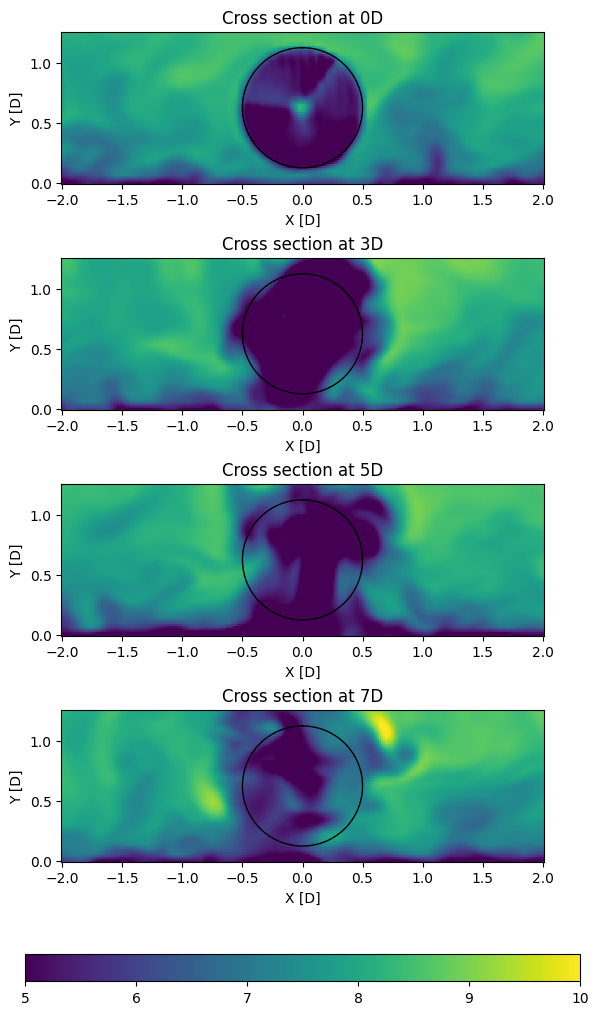

In [13]:
fig,ax = plt.subplots(ver_plane.z_N, 1, figsize = (6,10), constrained_layout = True)
for n in range(ver_plane.z_N):
    ax[n] = ver_plane.plot_plane(ver_plane.z[n], t, ax = ax[n], vmin=5., vmax=10.)
    ver_plane.plot_turbine(turb_loc = [0, hub_height/D], plane = 'yz')
    ax[n].set_title(f'Cross section at {int(ver_plane.z[n])}D')
fig.colorbar(im, ax=ax, location='bottom');

Plotting u mean velocity for plane at location 0.0
Nearest point to 0.0 is 0.0
Returning u mean velocity plane for slice at 0.0
Nearest time to 8800 is 8799.999999994761
Nearest time to 10800 is 10799.999999965657
Plotting u mean velocity for plane at location 3.0
Nearest point to 3.0 is 3.0
Returning u mean velocity plane for slice at 3.0
Nearest time to 8800 is 8799.999999994761
Nearest time to 10800 is 10799.999999965657
Plotting u mean velocity for plane at location 5.0
Nearest point to 5.0 is 5.0
Returning u mean velocity plane for slice at 5.0
Nearest time to 8800 is 8799.999999994761
Nearest time to 10800 is 10799.999999965657
Plotting u mean velocity for plane at location 7.0
Nearest point to 7.0 is 7.0
Returning u mean velocity plane for slice at 7.0
Nearest time to 8800 is 8799.999999994761
Nearest time to 10800 is 10799.999999965657


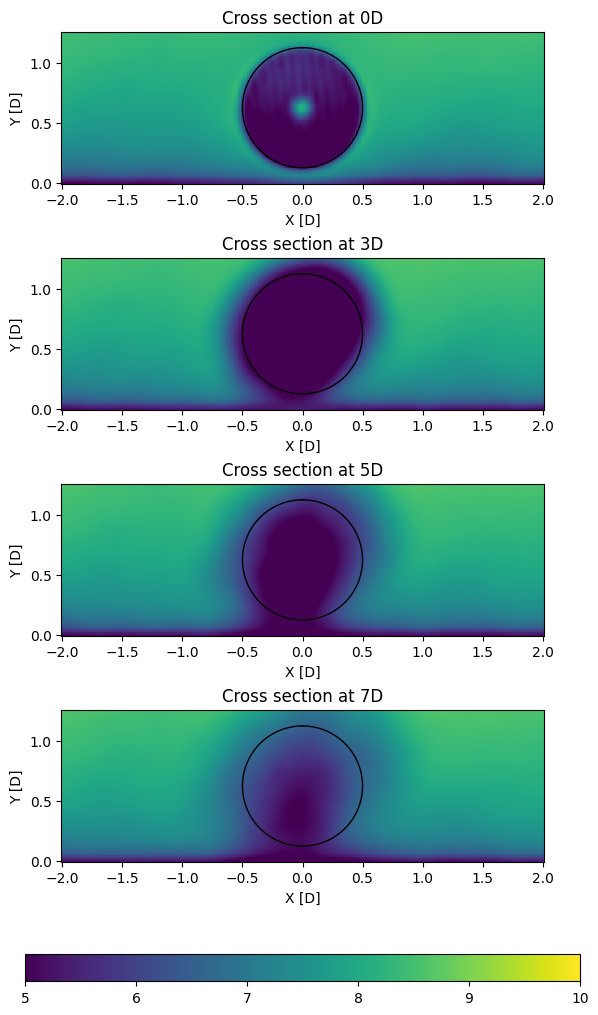

In [16]:
fig,ax = plt.subplots(ver_plane.z_N, 1, figsize = (6,10), constrained_layout = True)
for n in range(ver_plane.z_N):
    ax[n] = ver_plane.plot_mean_plane(ver_plane.z[n], timespan = timespan, ax = ax[n], vmin=5., vmax=10., verbose = True)
    ver_plane.plot_turbine(turb_loc = [0, hub_height/D], plane = 'yz')
    ax[n].set_title(f'Cross section at {int(ver_plane.z[n])}D')
fig.colorbar(im, ax=ax, location='bottom');

## Wake analysis

Nearest time to 8800 is 8799.999999994761
Nearest time to 10800 is 10799.999999965657
Nearest point to 0.0 is 0.0
Nearest time to 8800 is 8799.999999994761
Nearest time to 10800 is 10799.999999965657
Nearest point to 3.0 is 3.0
Nearest time to 8800 is 8799.999999994761
Nearest time to 10800 is 10799.999999965657
Nearest point to 5.0 is 5.0
Nearest time to 8800 is 8799.999999994761
Nearest time to 10800 is 10799.999999965657
Nearest point to 7.0 is 7.0
Plotting average u wake velocity for plane (z)


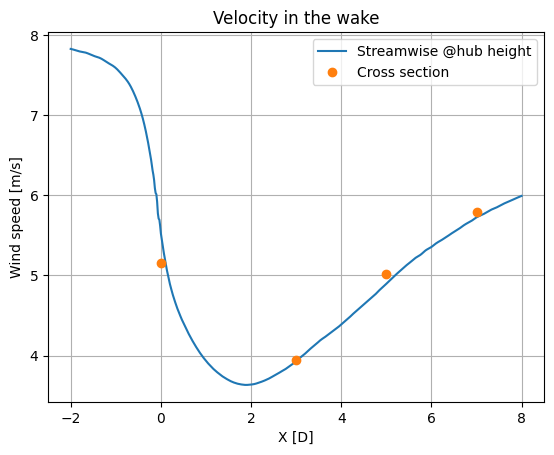

In [17]:
## Plot average wind speed in the wake
timespan = [8800, 10800]
fig_wake, ax_wake = plt.subplots()

hor_plane.plot_vel_in_wake(radius = 1/2, turb_loc = [0, 0, 150/D], \
                           z= 150/D, timespan=timespan, ax = ax_wake, verbose = 0)
ver_plane.plot_vel_in_wake(radius = 1/2, turb_loc = [0, 150/D, 0], \
                           timespan = timespan, axis = 'z', ax = ax_wake, linestyle = 'o', verbose = True)
ax_wake.legend(['Streamwise @hub height','Cross section'])
ax_wake.set_title('Velocity in the wake');

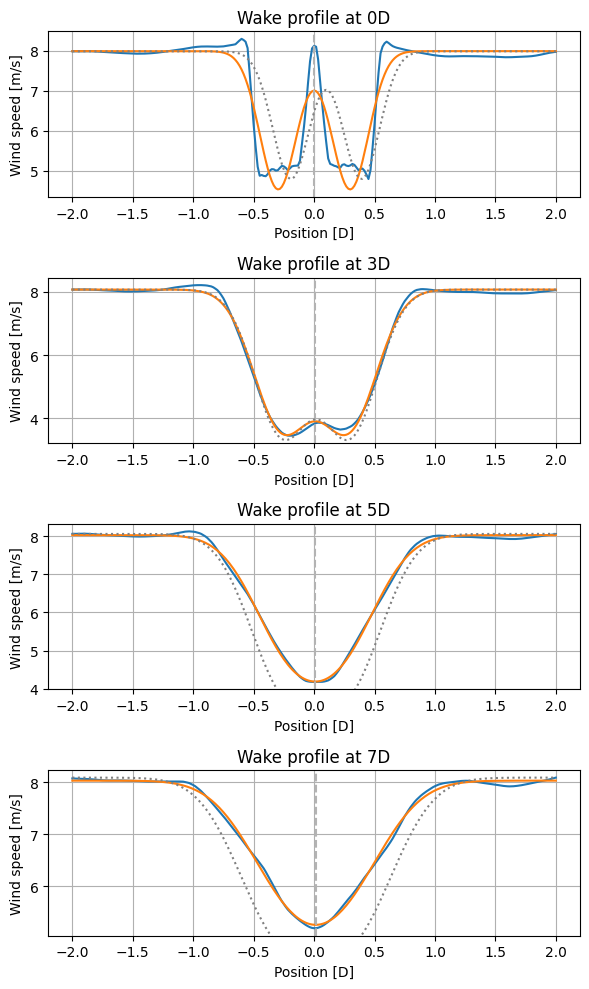

In [19]:
## Fit Gauss curve to the wake profile at 2D:7D
popt = []
N_cc = ver_plane.z_N
fig_prof, ax_prof = plt.subplots(N_cc, 1, figsize = (6,10), tight_layout=True)
for n in range(N_cc):
    popt = np.append(popt, hor_plane.fit_gauss_to_mean_wake_profile(\
                        ver_plane.z[n], timespan = timespan, fit='double', ax=ax_prof[n], verbose=False))
    ax_prof[n].set_title(f'Wake profile at {int(ver_plane.z[n])}D')
popt = popt.reshape((N_cc,5))

In [25]:
wake_center = []
t = 10000
wake_center.append(hor_plane.track_wake_center_over_distance(hub_height, fit = 'double', time = t))

Plotting u velocity for plane at location 150 at time 10000
Nearest point to 150 is 0.625
Nearest time to 10000 is 9999.999999977299
Returning u velocity plane for slice at 0.625 at time 9999.999999977299


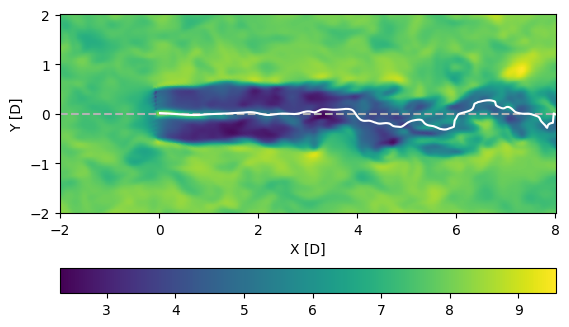

In [27]:
ax = hor_plane.plot_plane(hub_height, t)
ax.plot(ax.get_xlim(),[0, 0], '--', color='0.7')
ax.plot(hor_plane.x[np.where(hor_plane.x>0)], np.squeeze(wake_center),'w');

## -- OpenFAST turbine data --

In [31]:
turbine_files = ['IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out']
full_filename_turbine_file = []
for n in range(len(turbine_files)):
    full_filename_turbine_file.append(os.path.join(case_folder,turbine_files[n]))
fast_out = Post_turbine(full_filename_turbine_file)

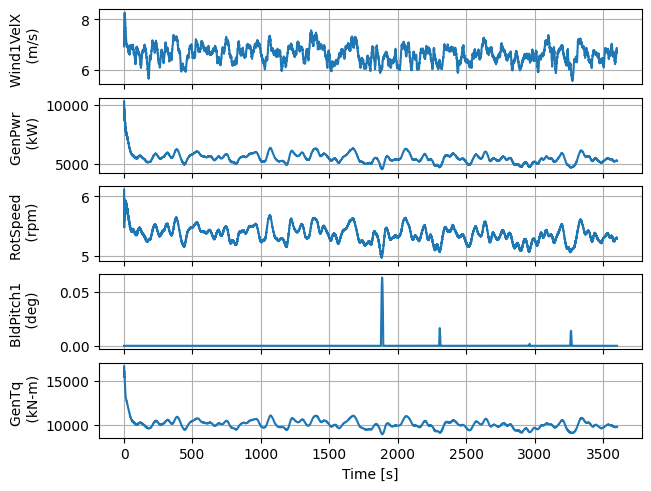

In [32]:
fig, axes = fast_out.plot_fast_out()